In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df1 = pd.read_csv('cip_ctx_ctz_gen_multi_data.csv')
df2 = pd.read_csv('cip_ctx_ctz_gen_pheno.csv')

# Data set 

### 1) Multi-data SNPs (single nucleotide polymorphism): 
	
Features: 

- prename: This is the isolate(sample) name.
- The other 60k plus features are the position of SNPs

Encoding: 
- A: Adenine = 1
- G: Guanine = 2
- C: Cytosine = 3
- T: Thymine = 4
- N: Null = 0


### 2) Phenotype:

Features: 

- CTX: This is the isolate's response to the drug cefotaxime.
- CTZ: This is the isolate's response to the drug ceftazidime
- GEN: This is the isolate's response to the drug gentamicin
- CIP: This is the isolate's response to the drug ciprofloxacin.
- Prename: the name of the sample

Encoding:

- 0 = Susceptible, 
- 1 = Resistant	

In [10]:
raw = pd.read_csv('ACTGN_input.csv')
raw

,Unnamed: 0,prename,X393,X588,X747,X759,X774,X966,X1299,X1302,...,X4639956.3,X4640785.3,X4640908.3,X4640924.3,X4641031.3,X4641131.3,X4641217.3,X4641296.3,X4641439.3,X4641440.3
0,0,H100_S2_L001,G,A,G,T,C,C,C,C,...,C,T,T,G,A,C,A,C,C,A
1,1,H105_S3_L001,G,A,G,T,C,C,C,C,...,C,T,T,G,A,C,A,C,C,A
2,2,H108_S5_L001,G,A,G,T,C,C,N,N,...,C,T,T,G,A,C,A,C,C,A
3,3,H109_S2_L001,G,A,G,T,C,C,C,C,...,C,T,T,G,A,C,A,C,C,A
4,4,H113_S6_L001,N,N,G,T,C,C,C,C,...,C,T,N,N,G,C,A,C,C,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804,804,wwRBK-17-0298-1_S42,N,N,G,T,C,C,N,N,...,C,T,N,N,G,C,A,C,C,A
805,805,wwRBK-17-075-1_S28,G,A,G,T,C,C,C,C,...,C,T,T,G,A,C,A,C,C,A
806,806,wwRBL-16-111-1_S16,G,N,N,N,C,N,C,C,...,C,T,N,N,N,C,N,N,N,N
807,807,wwRBL-17-004-1_S44,G,A,G,T,C,C,C,C,...,C,T,T,G,A,C,A,C,C,A


In [11]:
data = raw.replace({'A':1, 'G':2, 'C':3, 'T':4, 'N':0})
data

,prename,X393,X588,X747,X759,X774,X966,X1299,X1302,X1407,...,X4639956.3,X4640785.3,X4640908.3,X4640924.3,X4641031.3,X4641131.3,X4641217.3,X4641296.3,X4641439.3,X4641440.3
0,H100_S2_L001,2,1,2,4,3,3,3,3,4,...,3,4,4,2,1,3,1,3,3,1
1,H105_S3_L001,2,1,2,4,3,3,3,3,4,...,3,4,4,2,1,3,1,3,3,1
2,H108_S5_L001,2,1,2,4,3,3,0,0,4,...,3,4,4,2,1,3,1,3,3,1
3,H109_S2_L001,2,1,2,4,3,3,3,3,4,...,3,4,4,2,1,3,1,3,3,1
4,H113_S6_L001,0,0,2,4,3,3,3,3,4,...,3,4,0,0,2,3,1,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804,wwRBK-17-0298-1_S42,0,0,2,4,3,3,0,0,4,...,3,4,0,0,2,3,1,3,3,1
805,wwRBK-17-075-1_S28,2,1,2,4,3,3,3,3,4,...,3,4,4,2,1,3,1,3,3,1
806,wwRBL-16-111-1_S16,2,0,0,0,3,0,3,3,4,...,3,4,0,0,0,3,0,0,0,0
807,wwRBL-17-004-1_S44,2,1,2,4,3,3,3,3,4,...,3,4,4,2,1,3,1,3,3,1


In [15]:
df2

,prename,CIP,CTX,CTZ,GEN
0,H100_S2_L001,0,1,0,0
1,H105_S3_L001,1,1,0,0
2,H108_S5_L001,0,1,0,0
3,H109_S2_L001,0,1,0,0
4,H113_S6_L001,1,1,0,0
...,...,...,...,...,...
804,wwRBK-17-0298-1_S42,1,1,1,0
805,wwRBK-17-075-1_S28,1,1,1,1
806,wwRBL-16-111-1_S16,1,1,1,0
807,wwRBL-17-004-1_S44,1,1,1,1


In [49]:
amr_count = df2[['CIP', 'CTX', 'CTZ', 'GEN']].sum(axis = 'columns')
amr = amr_count.value_counts()
amr

0    339
3    136
1    120
4    116
2     98
Name: count, dtype: int64

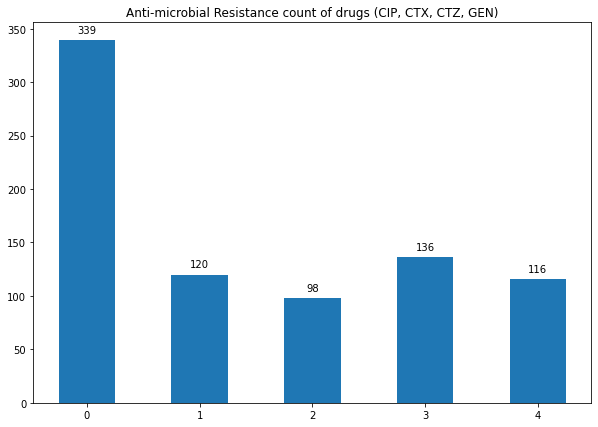

In [77]:

fig, ax = plt.subplots(figsize=(10, 7))
ax.hist(amr_count, bins=np.arange(amr_count.min(), amr_count.max()+2), align='left', rwidth = 0.5)
ax.set_title('Anti-microbial Resistance count of drugs (CIP, CTX, CTZ, GEN)')

for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(f'{int(height)}', xy=(rect.get_x()+rect.get_width()/2, height), 
                xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')

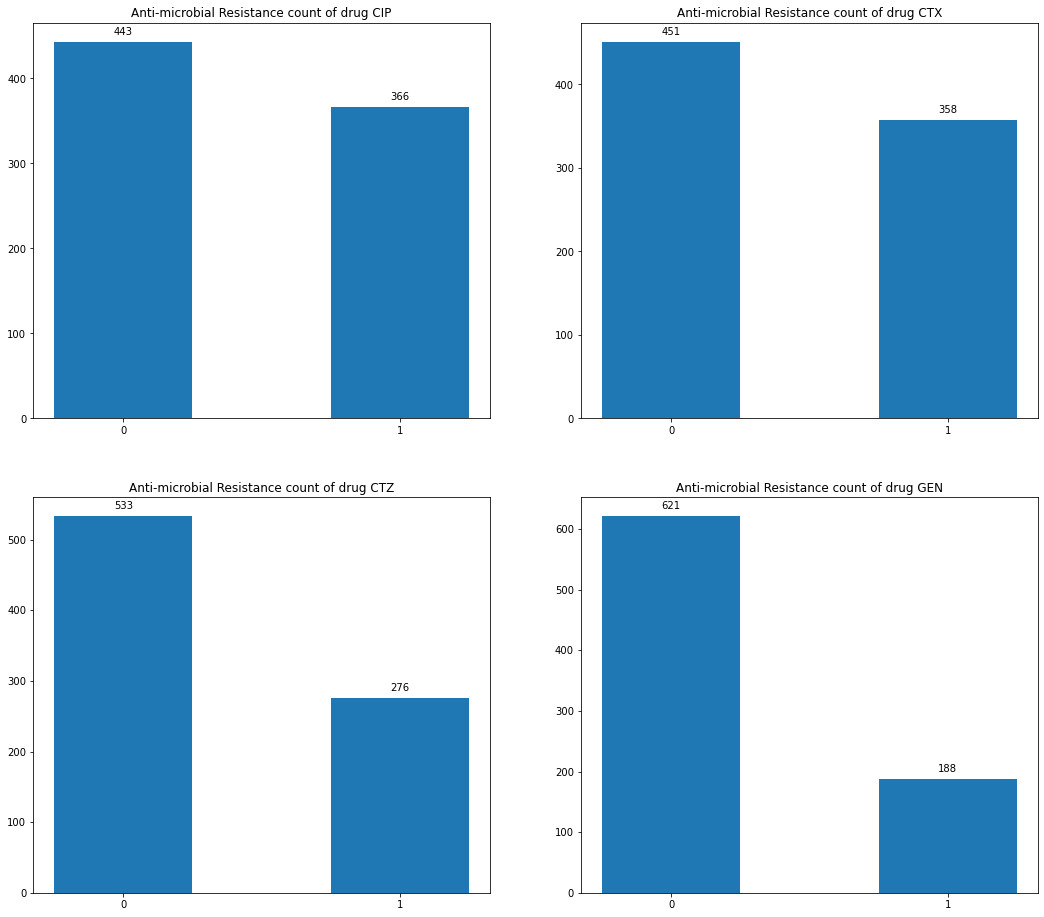

In [95]:
n_rows = 2
n_cols = 2
drugs = ['CIP', 'CTX', 'CTZ', 'GEN']
count = 0
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 16))
for row_num in range(n_rows):
    for col_num in range(n_cols):
        axes[row_num][col_num].hist(df2[drugs[count]], bins=np.arange(amr_count.min(), amr_count.max()-1), align='left', rwidth = 0.5)
        axes[row_num][col_num].set_title('Anti-microbial Resistance count of drug '+ drugs[count])
        axes[row_num][col_num].set_xticks([0,1])
        count += 1
        for rect in axes[row_num][col_num].patches:
            height = rect.get_height()
            axes[row_num][col_num].annotate(f'{int(height)}', xy=(rect.get_x()+rect.get_width()/2, height), 
                        xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')
        